Idea Summary: 

Tag line: Bring the stadium experience home 

Problem: 

Fans, athletes, and sponsors are missing the engagement of an in-arena experience 

Solution: 

app that brings in-game entertainment / jumbotron to the fans at home 

Application: 

Able to adjust which team you are cheering for 

Interactive in-game entertainment features like “kiss cam”, time-out games and 
promotions, music, noise meter, sponsor commercials, player videos

Fans can provide feedback through the noise meter

Real-time cheers for great plays in-arena for athletes to hear

Voting and streaming of replays

Special pre-game and post-game experiences like kids work-outs with players, autograph 
give-aways, one-on-one fan/player video chats

How it relates to the “Fluid Fan”

Grows with the fan (use unlocks features) 

Demo / Mock up 

For “fans”

Applicable to teams and events

NFL 

Hockey 

IOC 

NCAA 

User submission 

Dance cam / kiss cam 

noise meter 

“Likes” or shares of highlights 

Order merch & food 

Cheers 

Athlete content 

For Athletes / Teams 

Fan noise 

For Stadium (real time)

Noise 

Projection of home videos on jumbotron 

Backend Data 

Sponsorship data 


In [2]:
import pymongo
import arrow

In [3]:
import boto3 

In [4]:
from PIL import ImageDraw, ImageFont, Image, ImageFilter

import PIL

In [5]:
from shutil import copyfile


In [6]:
def mergsimg(imgone, imgtwo, out):
    marimg = PIL.Image.open(imgone)
    earimg = PIL.Image.open(imgtwo)
    Image.alpha_composite(marimg, earimg).save(out)

    

In [7]:
with open('/home/pi/mongo.txt', 'r') as monconf:
    monc = monconf.read().replace('\n', '')

In [8]:
s3 = boto3.resource('s3')

In [42]:
def resizetemp(sourcefil, tempfile, outfil):
    #give source file and tempfile. resizes the tempfile to be the same as
    #source.
    simg = PIL.Image.open(sourcefil)
    timg = PIL.Image.open(tempfile)
    timg.resize(simg.size)
    timg.save(outfil)
    

#earimg = PIL.Image.open(imgtwo)

In [43]:
#resizetemp('/home/pi/git/reactionstream/reactionstream/test.png', '/home/pi/Downloads/th.png', 'hello.png')

In [ ]:
#throw it out there. one quick change. fandom. top 5 in history. mount rushmore. kid photo of myself. incorputed into a scene. 

In [33]:
#marimg = PIL.Image.open('/home/pi/git/reactionstream/reactionstream/test.png')

#earimg = PIL.Image.open(imgtwo)

In [37]:
#marimg.size

(1280, 720)

In [40]:
#img = PIL.Image.open('/home/pi/Downloads/th.png')

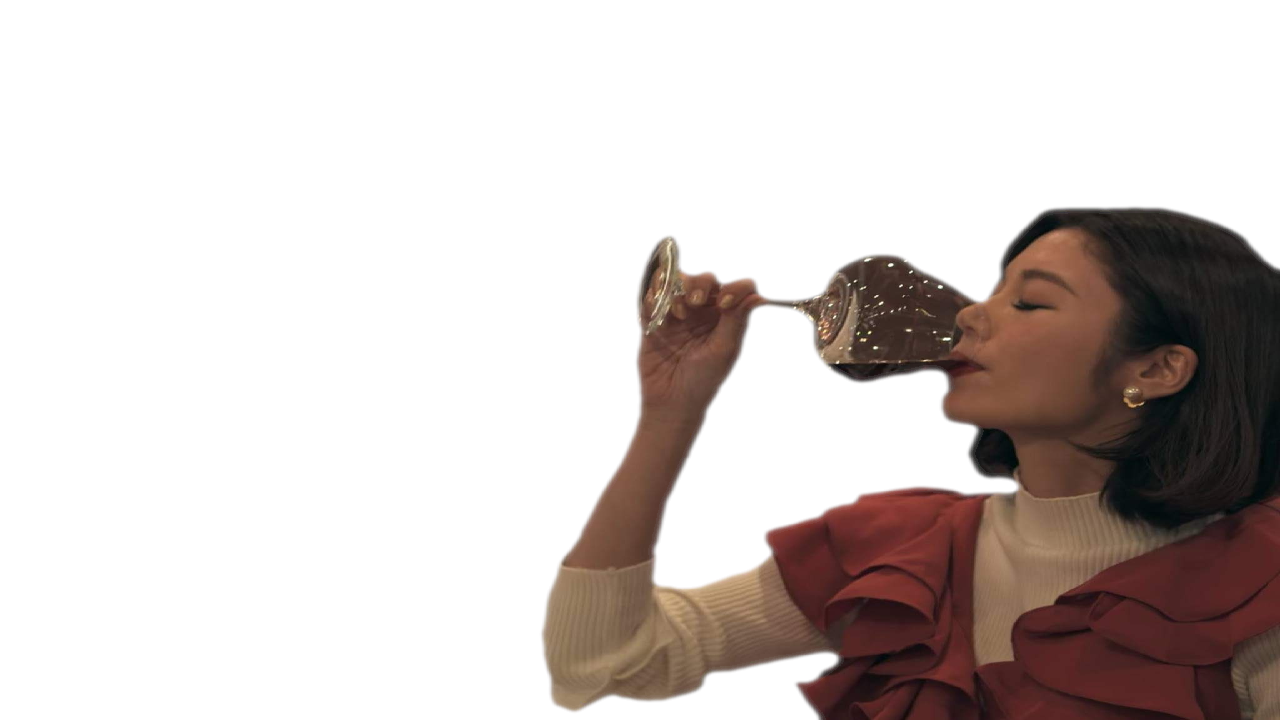

In [41]:
#img.resize(marimg.size)

In [10]:
client = pymongo.MongoClient(monc)

In [11]:
db = client['reactionstream']

# Fetch our series collection
series_collection = db['reaction']

In [38]:
def mergeupload(img1, img2, output):
    mergsimg(img1, img2, output)
    data = open('' + output, 'rb')
    s3.Bucket('printrecsup').put_object(Key=output, Body=data)
    #rewrite as meta data for the reaction frame. 
    #timnow = arrow.now()
    #post = {'image' : 'https://printrecsup.s3.amazonaws.com/' + output, 
    #            'imgsize' : imgsize, 'username' : username, 'price' : price, 
    #            'quantity' : quantity, 'totalinvoice' : price * quantity, 
    #            'datetime': timnow.timestamp, 'datedue' : duedate.timestamp,
    #            'printer' : printcompany, 'status' : status, 
    #            'labels' : somelis}
    #return(series_collection.insert_one(post).inserted_id)

In [21]:
import subprocess

In [48]:
def videotoframe(filvid, output):
    subprocess.call('ffmpeg -i {} -filter:v fps=fps=1/60 {}/ffmpeg_%0d.png'.format(
        filvid, output))
    #check size of outputed pngs. resize the overlay image to match
    #merge overlay image to this background image. 

In [ ]:
#videotoframe(filvid, output)

In [14]:
#mergsimg('/home/pi/Downloads/thbase.png', '/home/pi/Downloads/th.png', 'drink.png')

(2048, 1462)

In [15]:
#data = open('' + 'drink.png', 'rb')

In [26]:
#data

In [17]:
#s3.Bucket('printrecsup').put_object(Key='drink.png', Body=data)

s3.Object(bucket_name='printrecsup', key='drink.png')